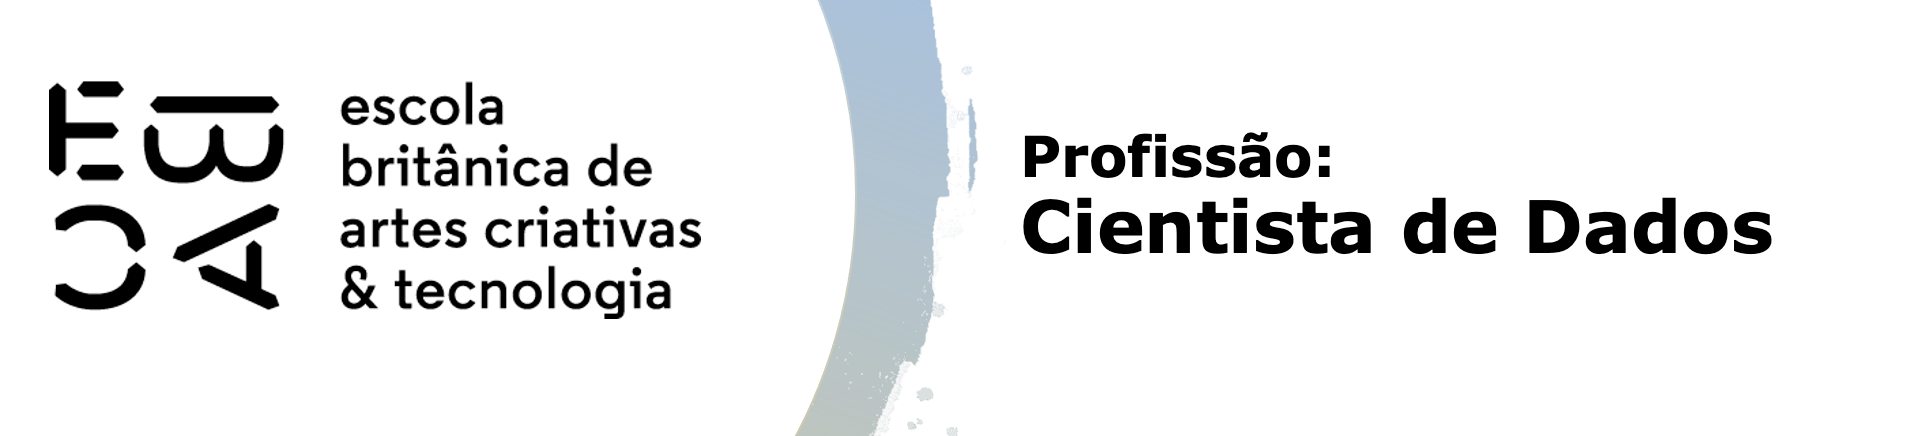

# Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pg = sns.load_dataset('penguins')

In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

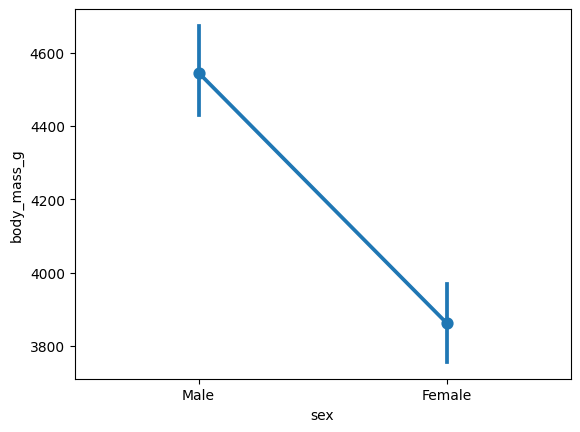

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [5]:
import scipy.stats as st

machos = pg[pg['sex'] == 'Male']['body_mass_g'].dropna()
femeas = pg[pg['sex'] == 'Female']['body_mass_g'].dropna()

t_stat, p_value = st.ttest_ind(machos, femeas)

print(f"Estatística T: {t_stat:.4f}")
print(f"P-valor: {p_value:.4e}")

print("Rejeitamos a hipótese nula. Há evidências estatísticas de diferença significativa de peso entre machos e fêmeas.")

Estatística T: 8.5417
P-valor: 4.8972e-16
Rejeitamos a hipótese nula. Há evidências estatísticas de diferença significativa de peso entre machos e fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

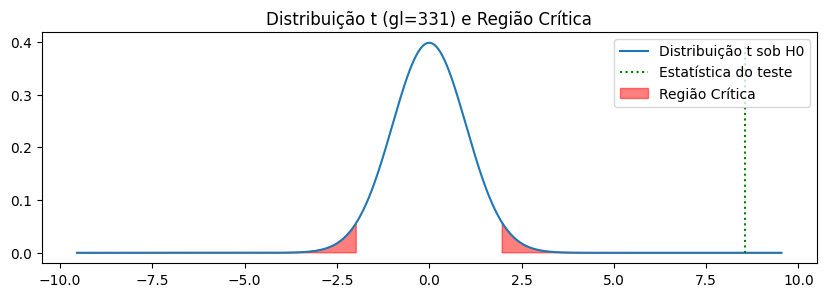

In [6]:
fig, ax = plt.subplots(figsize=(10,3))

# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance**.5
dof = len(machos) + len(femeas) - 2

# Valores de X e Y para plotar a densidade
# Ajustando o eixo X para garantir que a estatística T apareça
limit = max(4, abs(t_stat) + 1)
x = np.linspace(-limit, limit, 1000)
y = st.t.pdf(x, dof)

# Região crítica do teste (bicaudal, 5%)
alpha = 0.05
crit_val = st.t.ppf(1 - alpha/2, dof)

# Gráfico da densidade
ax.plot(x, y, label='Distribuição t sob H0')

# Esta linha de referência marca o valor observado da estatística do teste
ax.vlines(x=[t_stat],
             ymin=0, ymax=y.max(), 
             colors='g', linestyles='dotted', label='Estatística do teste')

plt.fill_between(x, y, where=(x > crit_val) | (x < -crit_val), color='red', alpha=.5, label='Região Crítica')

plt.legend()
plt.title(f'Distribuição t (gl={dof}) e Região Crítica')
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [7]:
for especie in pg['species'].unique():
    pg_especie = pg[pg['species'] == especie]
    machos = pg_especie[pg_especie['sex'] == 'Male']['body_mass_g'].dropna()
    femeas = pg_especie[pg_especie['sex'] == 'Female']['body_mass_g'].dropna()
    
    t_stat, p_value = st.ttest_ind(machos, femeas)
    
    print(f"Espécie: {especie}")
    print(f"  Estatística T: {t_stat:.4f}")
    print(f"  P-valor: {p_value:.4e}")
    print("-" * 30)

Espécie: Adelie
  Estatística T: 13.1263
  P-valor: 2.2206e-26
------------------------------
Espécie: Chinstrap
  Estatística T: 5.2077
  P-valor: 2.0440e-06
------------------------------
Espécie: Gentoo
  Estatística T: 14.7217
  P-valor: 2.1337e-28
------------------------------
